In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [40]:
df = pd.read_csv('voodoo.csv', delimiter=';')

In [ ]:
import scipy.stats as stats


In [41]:
df.shape

(372834, 18)

In [42]:
df.describe()

,ab_cohort_id,segment_id,session_length,session_number_,publisher_revenue,fs_shown,rv_shown,game_count,offline_game_count
count,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000,372834.000000
mean,790.118836,785.972293,343.127223,4.733648,0.037661,3.962396,0.116744,3.295349,0.329238
std,4.728462,4.234101,428.156511,5.541589,0.059510,5.833954,0.587625,4.281505,2.304426
min,727.000000,722.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,787.000000,783.000000,73.000000,1.000000,0.001894,1.000000,0.000000,1.000000,0.000000
50%,789.000000,783.000000,200.000000,3.000000,0.016996,2.000000,0.000000,2.000000,0.000000
75%,794.000000,792.000000,462.000000,6.000000,0.049363,5.000000,0.000000,4.000000,0.000000
max,799.000000,792.000000,41561.000000,137.000000,2.891824,411.000000,54.000000,271.000000,270.000000


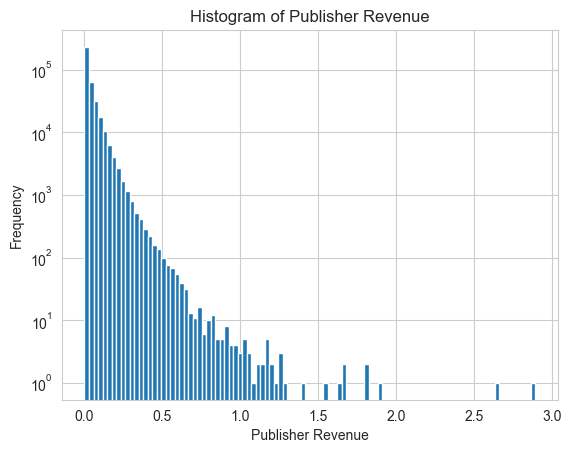

In [43]:
# Plotting Histogram for Publisher Revenue
plt.hist(df['publisher_revenue'], bins=100, log=True)
plt.xlabel('Publisher Revenue')
plt.ylabel('Frequency')
plt.title('Publisher Revenue Histogram')
plt.show()

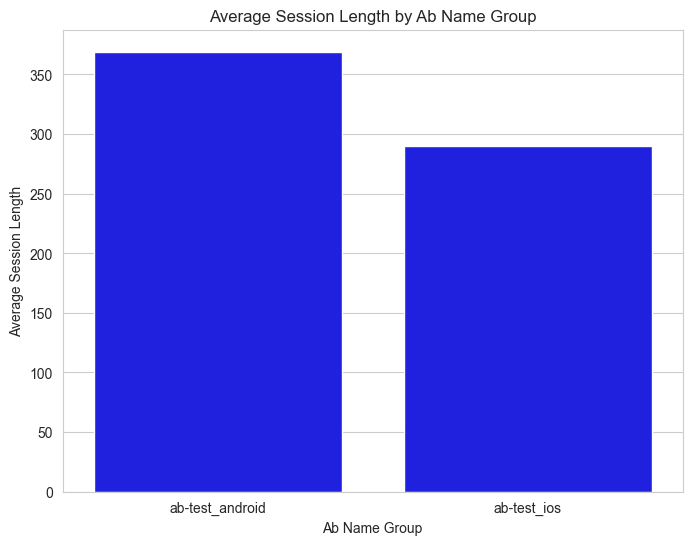

In [44]:
avg_ses_len = df.groupby('ab_name')['session_length'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_ses_len.index, y=avg_ses_len.values, color='blue')
plt.xlabel('Ab Name Group')
plt.ylabel('Average Session Length')
plt.title('Average Session Length by Ab Name Group')
plt.savefig('img_1.png')
plt.show()

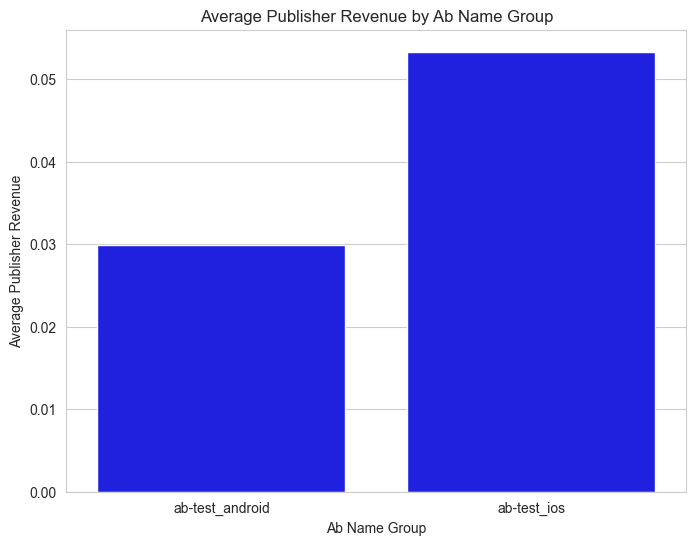

In [45]:
# average publisher_revenue per ab_name
avg_revenue = df.groupby('ab_name')['publisher_revenue'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_revenue.index, y=avg_revenue.values, color='blue')
plt.xlabel('Ab Name Group')
plt.ylabel('Average Publisher Revenue')
plt.title('Average Publisher Revenue by Ab Name Group')
plt.savefig('img2.png')
plt.show()

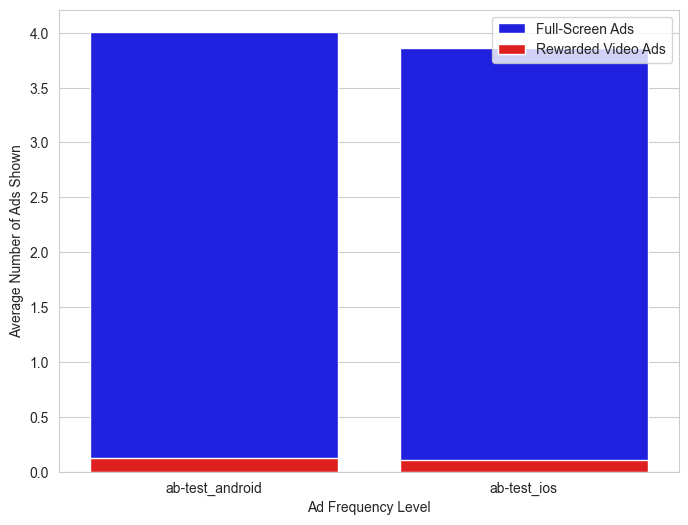

In [103]:
avg_fullscrn_shown = df.groupby('ab_name')['fs_shown'].mean()
avg_rewardvd_shown = df.groupby('ab_name')['rv_shown'].mean()


sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_fullscrn_shown.index, y=avg_fullscrn_shown.values, color='blue', label='Full-Screen Ads')
sns.barplot(x=avg_rewardvd_shown.index, y=avg_rewardvd_shown.values, color='red', label='Rewarded Video Ads')
plt.xlabel('Ad Frequency Level')
plt.ylabel('Average Number of Ads Shown')
plt.legend()
plt.savefig('img7.png')
plt.show()

In [38]:
# Calculate the correlation matrix
corr_matrix = df[['fs_shown', 'rv_shown', 'publisher_revenue']].corr()

# Print the correlation matrix
print(corr_matrix)

                   fs_shown  rv_shown  publisher_revenue
fs_shown           1.000000  0.203842           0.606517
rv_shown           0.203842  1.000000           0.287680
publisher_revenue  0.606517  0.287680           1.000000


% of offline users: 7.76%
% of online users: 92.26%


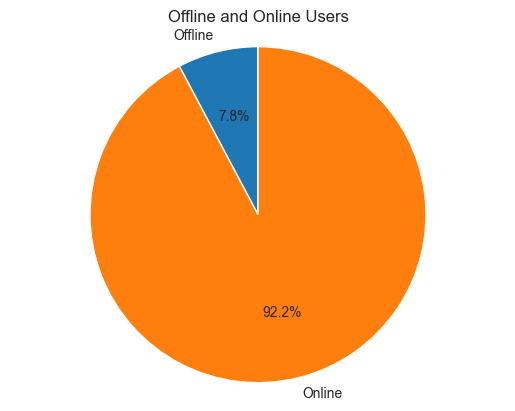

In [63]:
# Number of sessions when user was offline and online
offline_ses = df[df["offline_game_count"] > 0]["session_id"].nunique()
online_ses = df[df["offline_game_count"] == 0]["session_id"].nunique()

# Calculating Representation
total_sessions = df["session_id"].nunique()
offline_coef = (offline_ses / total_sessions)
online_coef = (online_ses / total_sessions)

print(f"% of offline users: {offline_coef * 100:.2f}%")
print(f"% of online users: {online_coef * 100:.2f}%")

# Pie chart
labels = ["Offline", "Online"]
sizes = [offline_coef * 100, online_coef * 100]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Offline and Online Users")

# Show the pie chart
plt.savefig('pie.png')
plt.show()

In [58]:
# Separate offline and online users
offline_revenue = df[df["offline_game_count"] > 0]["publisher_revenue"]
online_revenue = df[df["offline_game_count"] == 0]["publisher_revenue"]

# Perform a t-test
t_stat, p_value = stats.ttest_ind(offline_revenue, online_revenue, equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -46.0620412319865
p-value: 0.0


<Axes: >

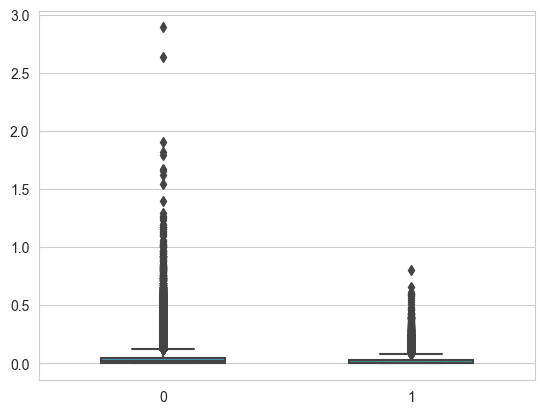

In [59]:
# Create a subset of the data for online and offline users
online_revenue = df[df['offline_game_count'] == 0]['publisher_revenue']
offline_revenue = df[df['offline_game_count'] > 0]['publisher_revenue']

# Create box plots for online and offline revenue
sns.boxplot(data=[online_revenue, offline_revenue],
            width=0.5,
            palette=["#39A7D0", "#36ADA4"])

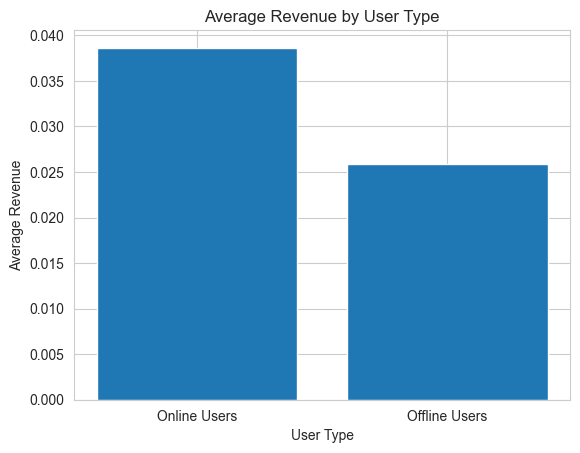

In [60]:
# Calculate the average revenue for online and offline users
online_mean_revenue = df[df['offline_game_count']==0]['publisher_revenue'].mean()
offline_mean_revenue = df[df['offline_game_count']>0]['publisher_revenue'].mean()

# Create a bar chart
labels = ['Online Users', 'Offline Users']
values = [online_mean_revenue, offline_mean_revenue]
plt.bar(labels, values)

# Set chart title and axis labels
plt.title('Average Revenue by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Revenue')

# Display chart
plt.show()

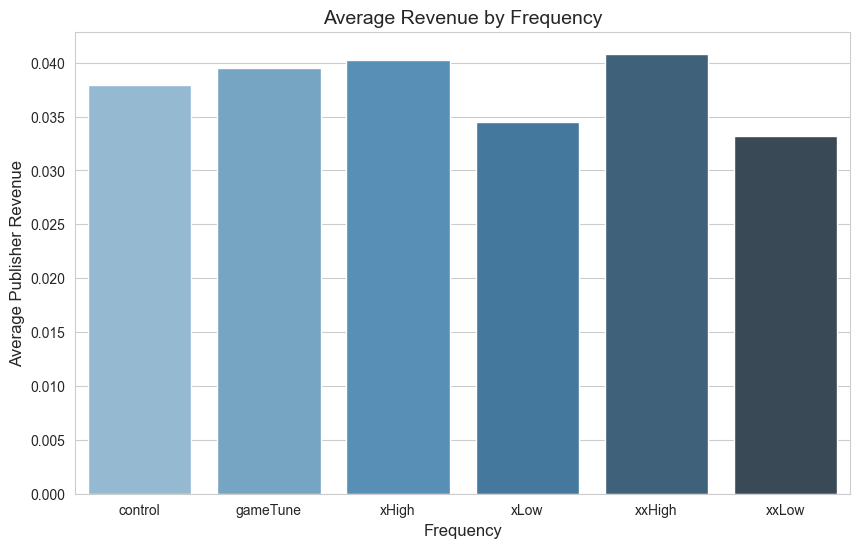

In [66]:
revenue_by_frequancy = df.groupby('ab_cohort_name')['publisher_revenue'].mean().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='ab_cohort_name', y='publisher_revenue', data=revenue_by_frequancy, palette='Blues_d')
plt.title('Average Revenue by Frequency', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Average Publisher Revenue', fontsize=12)
plt.savefig('img5.png')
plt.show()

In [91]:
import scipy.stats as stats

control_group = df[df['ab_cohort_name'] == 'control']['publisher_revenue']
frequancies = ['xxHigh', 'xxLow', 'xHigh', 'xLow']

for frequancy in frequancies:
    testing_group = df[df['ab_cohort_name'] == frequancy]['publisher_revenue']
    t_stat, p_val = stats.ttest_ind(testing_group, control_group, alternative='greater'
                                                                '')
    print(f"{frequancy}: t-statistic = {t_stat:}, p-value = {p_val:}")


xxHigh: t-statistic = 8.081369203502192, p-value = 3.2306383776534334e-16
xxLow: t-statistic = -15.086216016059772, p-value = 1.0
xHigh: t-statistic = 6.527663920110893, p-value = 3.3528777627715544e-11
xLow: t-statistic = -11.142398054495619, p-value = 1.0


In [95]:
import scipy.stats as stats

control_group = df[df['ab_cohort_name'] == 'control']['publisher_revenue']
frequancies = ['xxHigh', 'xxLow', 'xHigh', 'xLow']

for frequancy in frequancies:
    testing_group = df[df['ab_cohort_name'] == frequancy]['session_length']
    t_stat, p_val = stats.ttest_ind(testing_group, control_group, alternative='greater'
                                                                '')
    print(f"{frequancy}: t-statistic = {t_stat:}, p-value = {p_val:}")

xxHigh: t-statistic = 201.52796586512267, p-value = 0.0
xxLow: t-statistic = 210.85804237574305, p-value = 0.0
xHigh: t-statistic = 188.5541878076142, p-value = 0.0
xLow: t-statistic = 205.25655266683555, p-value = 0.0


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='ab_cohort_name', y='publisher_revenue', hue='session_length', data=df)
plt.title('Revenue by AB Cohort Name and Session Length')
plt.xlabel('AB Cohort Name')
plt.ylabel('Publisher Revenue')
plt.show()

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

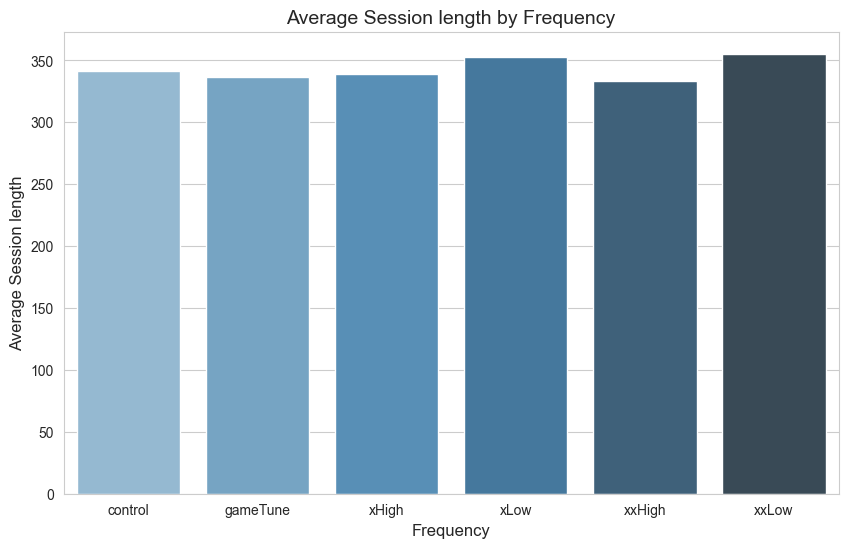

In [99]:
revenue_by_frequancy = df.groupby('ab_cohort_name')['session_length'].mean().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='ab_cohort_name', y='session_length', data=revenue_by_frequancy, palette='Blues_d')
plt.title('Average Session length by Frequency', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Average Session length', fontsize=12)
plt.savefig('img6.png')
plt.show()

In [100]:
import scipy.stats as stats

# Create a list of the experimental groups
testing_groups = ['xxHigh', 'xxLow', 'xHigh', 'xLow']

# Loop through each experimental group
for group in testing_groups:
    # Select the session_length values for the current group
    group_data = df[df['ab_cohort_name'] == group]['session_length']

    # Calculate the t-statistic and p-value for a one-tailed t-test
    t_stat, p_val = stats.ttest_ind(group_data, df[df['ab_cohort_name'] == 'control']['session_length'], alternative='greater')

    # Print the results
    print(f'{group}: t-statistic = {t_stat}, p-value = {p_val/2:.3f}')

xxHigh: t-statistic = -3.4989282702327267, p-value = 0.500
xxLow: t-statistic = 5.677737590634023, p-value = 0.000
xHigh: t-statistic = -1.1651004993081588, p-value = 0.439
xLow: t-statistic = 4.496530869586387, p-value = 0.000


In [101]:
corr_coef = df['game_count'].corr(df['session_length'], method='pearson')

print(" Correlation coefficient between game_count and session_length:", corr_coef)

Pearson correlation coefficient between game_count and session_length: 0.8044489542042207
